In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import matplotlib.ticker as plticker
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from collections import defaultdict
from typing import Optional
from scipy.integrate import solve_ivp
from scipy.fftpack import diff as psdiff
import torch

import os, sys
sys.path.append(os.path.join(os.getcwd(), '../sympde'))

from data.generate_data import GeneratePDEData
from data.pde_collection import CollectionPDE_Pseudospectral
from plot_pde_data import plot_1d, plot_1ds, plot_1d_dict
from data.utils import save_obj, load_obj

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
L, Nx = 64, 256
T, Nt = 40, 40
tol = 1e-6

N_samples = 2

pde_collection = CollectionPDE_Pseudospectral(L = L).collection
pde_data = GeneratePDEData(L=L, T=T, Nx=Nx, Nt=Nt, tol=tol)

data = {}

for i, (pde_name, pde_func) in enumerate(pde_collection.items()):
    d = pde_data.generate_data(pde_func, N_samples = N_samples)
    data[pde_name] = d


Generating data pde_func!: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


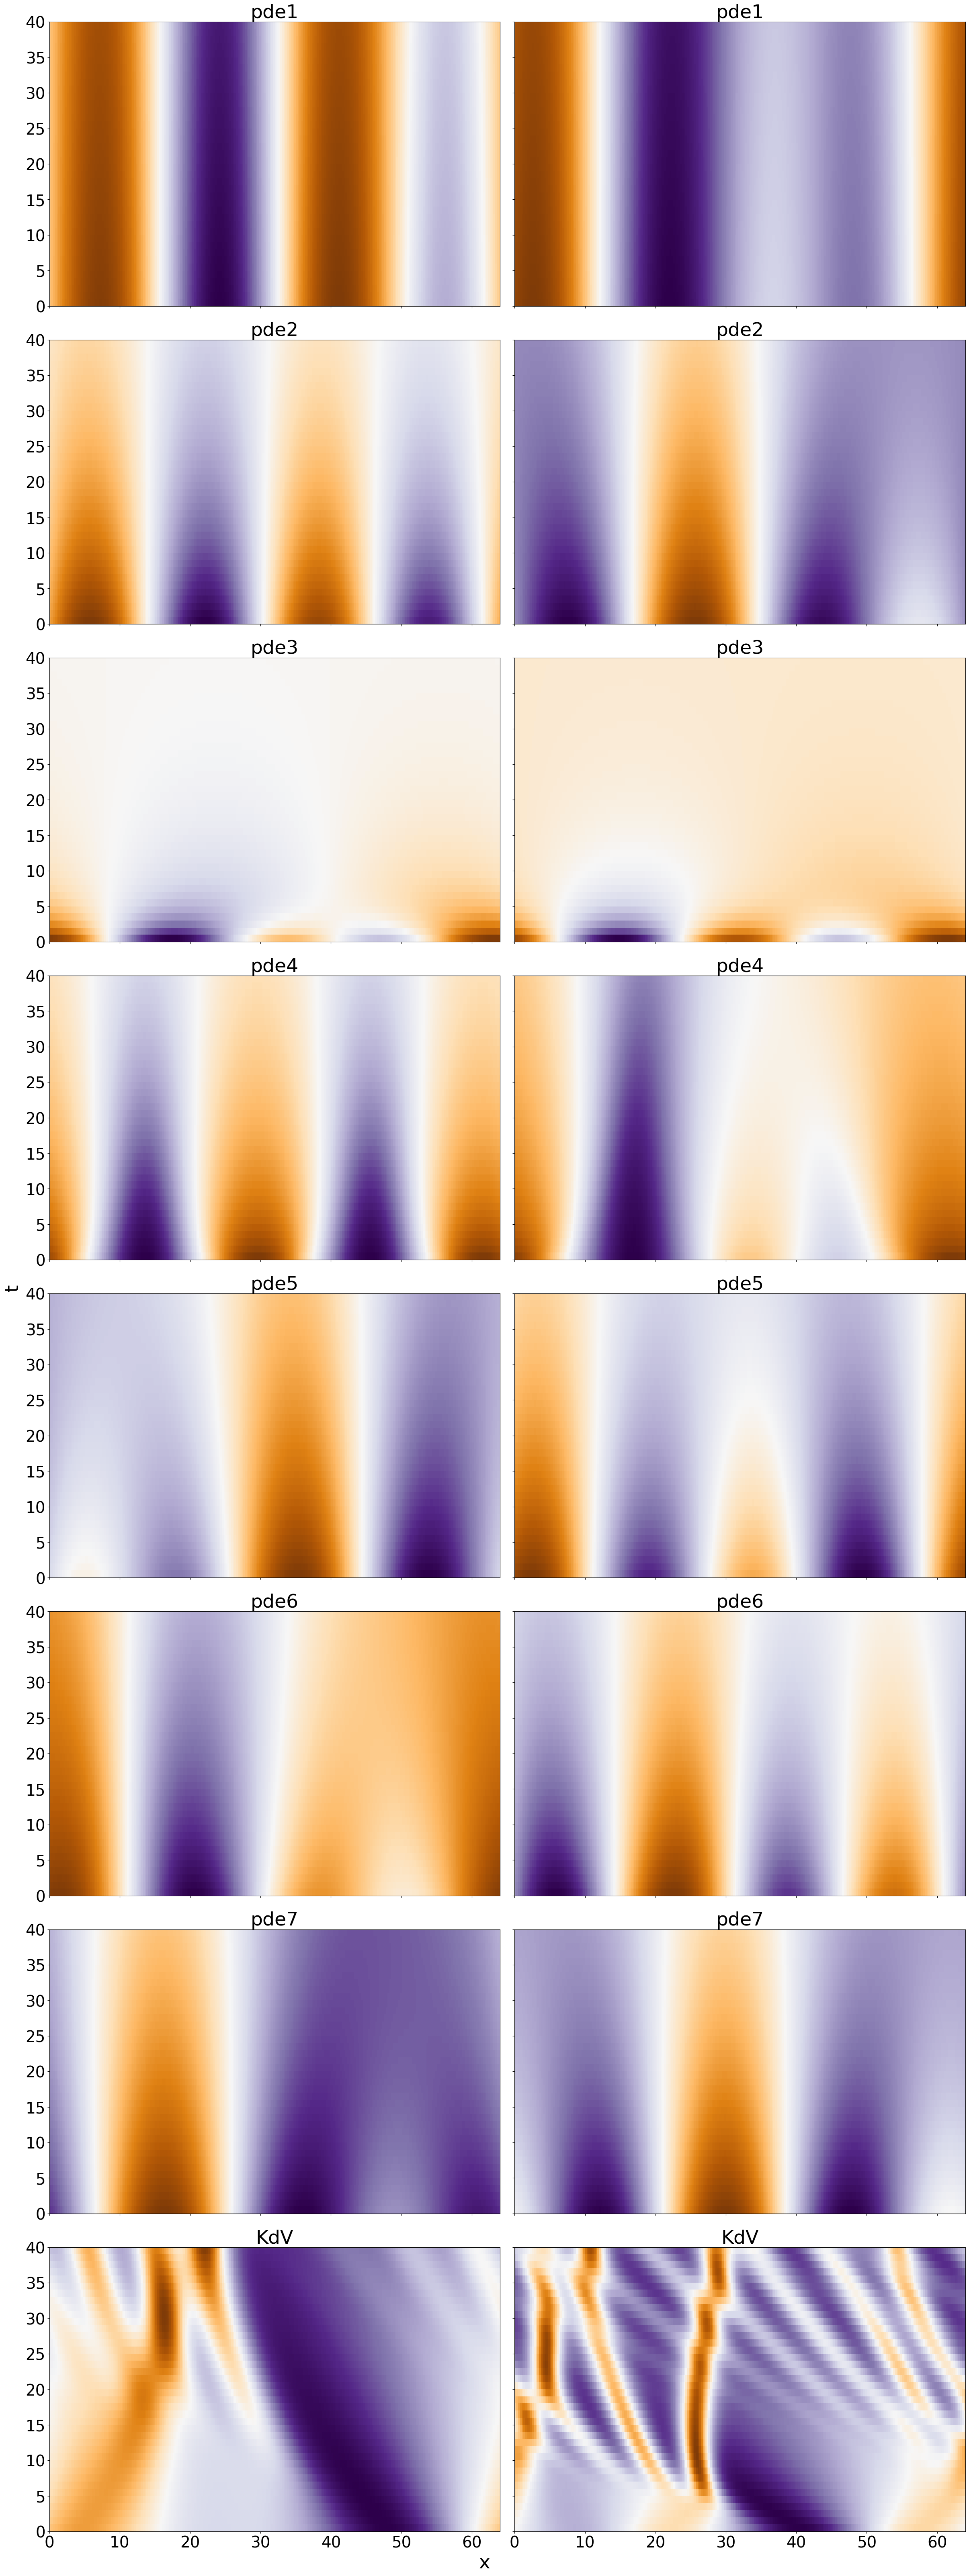

In [25]:
plot_1d_dict(data)

### Generating and saving data

In [26]:
data_path = os.path.join(os.getcwd(), '../data')
print('Data path:', data_path)

splits = {'train': 0.8, 'val': 0.1, 'test': 0.1}

os.makedirs(os.path.join(data_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(data_path, 'val'),   exist_ok=True)
os.makedirs(os.path.join(data_path, 'test'),  exist_ok=True)

Data path: /Users/elias/Documenten MBA/Studie/Thesis/SymPDE/notebooks/../data


In [27]:
N_samples = 200

pde_collection = CollectionPDE_Pseudospectral(L = L).collection
pde_data = GeneratePDEData(L=L, T=T, Nx=Nx, Nt=Nt, tol=tol)

for pde_name, pde_func in pde_collection.items():
    us, dx, dt = pde_data.generate_data(pde_func, N_samples = N_samples)
    
    us_train = us[:int(splits['train']*N_samples)]
    us_val   = us[int(splits['train']*N_samples):int((splits['train']+splits['val'])*N_samples)]
    us_test  = us[int((splits['train']+splits['val'])*N_samples):]

    save_obj((us, dx, dt), os.path.join(data_path, 'train', pde_name))
    save_obj((us, dx, dt), os.path.join(data_path, 'val',   pde_name))
    save_obj((us, dx, dt), os.path.join(data_path, 'test',  pde_name))

Generating data pde_func!:   0%|          | 0/200 [00:00<?, ?it/s]

Generating data pde_func!: 100%|██████████| 200/200 [01:30<00:00,  2.20it/s]


Load data to verify

In [28]:
pde_name = 'pde5'
us, dx, dt = d = load_obj(os.path.join(data_path, 'train', f'{pde_name}'))
print(f'Train data of {pde_name} has shape:', us.shape)

Train data of pde5 has shape: (200, 40, 256)


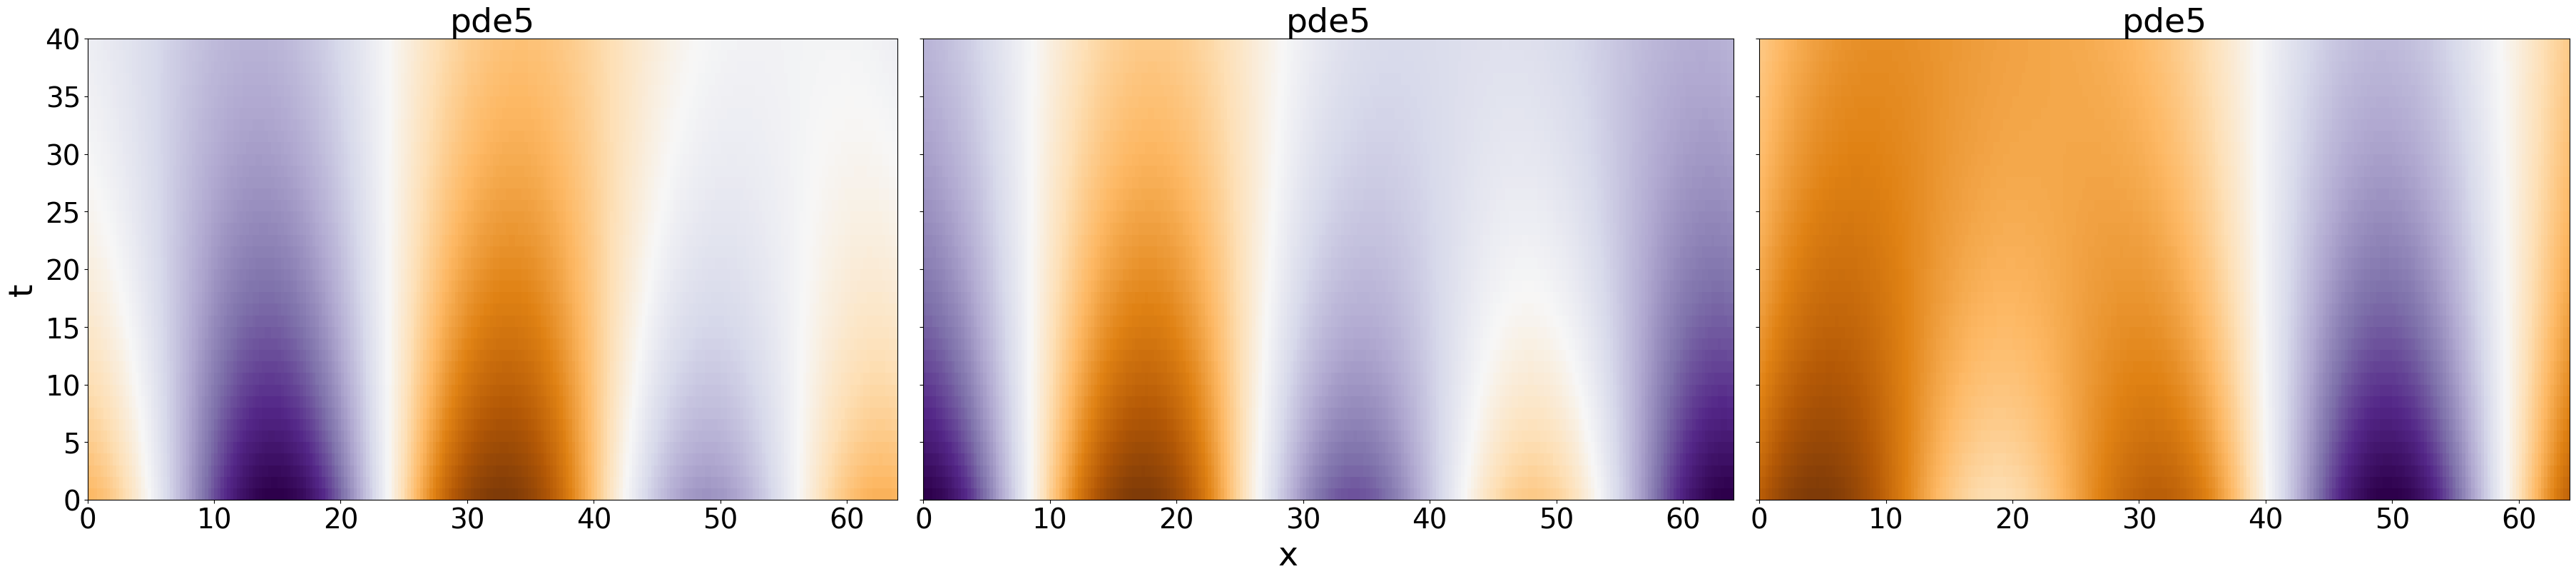

In [29]:
plot_1d_dict({pde_name :(us[:3], dx, dt)})